# This is Rain fall predication in Australia and EDA.

### Importing Modules

In [1]:
# importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score

### Importing Dataset

In [66]:
df = pd.read_csv("weatherAUS.csv",nrows=10000)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [67]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10000 non-null  object 
 1   Location       10000 non-null  object 
 2   MinTemp        9946 non-null   float64
 3   MaxTemp        9955 non-null   float64
 4   Rainfall       9868 non-null   float64
 5   Evaporation    3577 non-null   float64
 6   Sunshine       1485 non-null   float64
 7   WindGustDir    9819 non-null   object 
 8   WindGustSpeed  9819 non-null   float64
 9   WindDir9am     8990 non-null   object 
 10  WindDir3pm     9850 non-null   object 
 11  WindSpeed9am   9923 non-null   float64
 12  WindSpeed3pm   9927 non-null   float64
 13  Humidity9am    9812 non-null   float64
 14  Humidity3pm    9811 non-null   float64
 15  Pressure9am    9794 non-null   float64
 16  Pressure3pm    9789 non-null   float64
 17  Cloud9am       4858 non-null   float64
 18  Cloud3p

In [68]:
# shape of data:
print(f'Number of columns: { df.shape[0]} and Number of rows: {df.shape[1]}')

Number of columns: 10000 and Number of rows: 23


In [69]:
# Checking for null values
df.isna().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          132
Evaporation      6423
Sunshine         8515
WindGustDir       181
WindGustSpeed     181
WindDir9am       1010
WindDir3pm        150
WindSpeed9am       77
WindSpeed3pm       73
Humidity9am       188
Humidity3pm       189
Pressure9am       206
Pressure3pm       211
Cloud9am         5142
Cloud3pm         4936
Temp9am            58
Temp3pm            60
RainToday         132
RainTomorrow      132
dtype: int64

In [70]:
# statistical info of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,9946.0,11.555952,6.311448,-3.0,6.5,11.4,16.6,29.7
MaxTemp,9955.0,24.121386,7.177764,6.8,18.4,23.6,29.2,46.6
Rainfall,9868.0,2.145511,8.620206,0.0,0.0,0.0,0.2,371.0
Evaporation,3577.0,5.989265,5.075015,0.0,2.6,4.6,8.2,86.2
Sunshine,1485.0,7.785387,3.828285,0.0,5.0,9.0,10.7,13.7
WindGustSpeed,9819.0,34.872085,12.513246,7.0,26.0,33.0,43.0,107.0
WindSpeed9am,9923.0,10.769122,7.359283,0.0,6.0,9.0,15.0,48.0
WindSpeed3pm,9927.0,15.113327,7.436124,0.0,9.0,15.0,20.0,56.0
Humidity9am,9812.0,68.804831,20.491816,5.0,55.0,70.0,85.0,100.0
Humidity3pm,9811.0,46.154419,20.990758,1.0,30.0,45.0,60.0,100.0


In [71]:
# Identifying Continuous and Categorical Columns
category=[]
contin = []

for i in df.columns:
    if df[i].dtype =="object":
        category.append(i)
        
    else:
        contin.append(i)

print("Categorical:",category)
print("Continuous:", contin)

Categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Continuous: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [72]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Encoding RainToday and RainTomorrow Columns** using LabelEncoder

In [73]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [74]:
df["RainToday"].unique()
df["RainTomorrow"].unique()

array([ 0.,  1., nan])

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
df[["RainToday","RainTomorrow"]]

,RainToday,RainTomorrow
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9995,0.0,0.0
9996,0.0,1.0
9997,1.0,0.0
9998,0.0,1.0


Percentage of **Null values in dataset**

In [77]:
(df.isnull().sum()/len(df))*100

Date              0.00
Location          0.00
MinTemp           0.54
MaxTemp           0.45
Rainfall          1.32
Evaporation      64.23
Sunshine         85.15
WindGustDir       1.81
WindGustSpeed     1.81
WindDir9am       10.10
WindDir3pm        1.50
WindSpeed9am      0.77
WindSpeed3pm      0.73
Humidity9am       1.88
Humidity3pm       1.89
Pressure9am       2.06
Pressure3pm       2.11
Cloud9am         51.42
Cloud3pm         49.36
Temp9am           0.58
Temp3pm           0.60
RainToday         1.32
RainTomorrow      1.32
dtype: float64

In [78]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [79]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Handling Null values

In [50]:
# filling the missing values for continuous variables with mean
df["MinTemp"]= df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"]= df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Evaporation"]= df["Evaporation"].fillna(df["Evaporation"].mean())
df["Sunshine"]= df["Sunshine"].fillna(df["Sunshine"].mean())
df["WindGustSpeed"]= df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean())
df["Rainfall"]= df["Rainfall"].fillna(df["Rainfall"].mean())
df["WindSpeed9am"]= df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean())
df["WindSpeed3pm"]= df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"]= df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"]= df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"]= df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"]= df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Cloud9am"]= df["Cloud9am"].fillna(df["Cloud9am"].mean())
df["Cloud3pm"]= df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
df["Temp9am"]= df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"]= df["Temp3pm"].fillna(df["Temp3pm"].mean())

In [51]:
#Filling the missing values for continuous variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [52]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.757227,7.811786,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.452521,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.757227,7.811786,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.327575,4.452521,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,5.757227,7.811786,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.327575,2.000000,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.757227,7.811786,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.327575,4.452521,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.757227,7.811786,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [53]:
# again checking for null values
(df.isnull().sum()/len(df))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

### **Countplot** for RainToday and Raintomorrow:

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

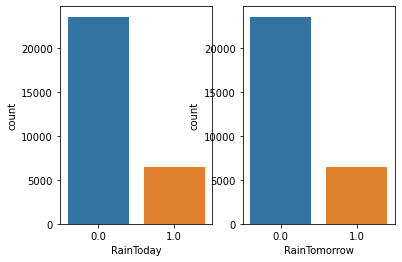

<Figure size 576x360 with 0 Axes>

In [54]:
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(8,5))
sns.countplot(df["RainToday"],ax=ax[0])
sns.countplot(df["RainTomorrow"],ax = ax[1])

### Heatmap showing **Correlation** among attributes of data

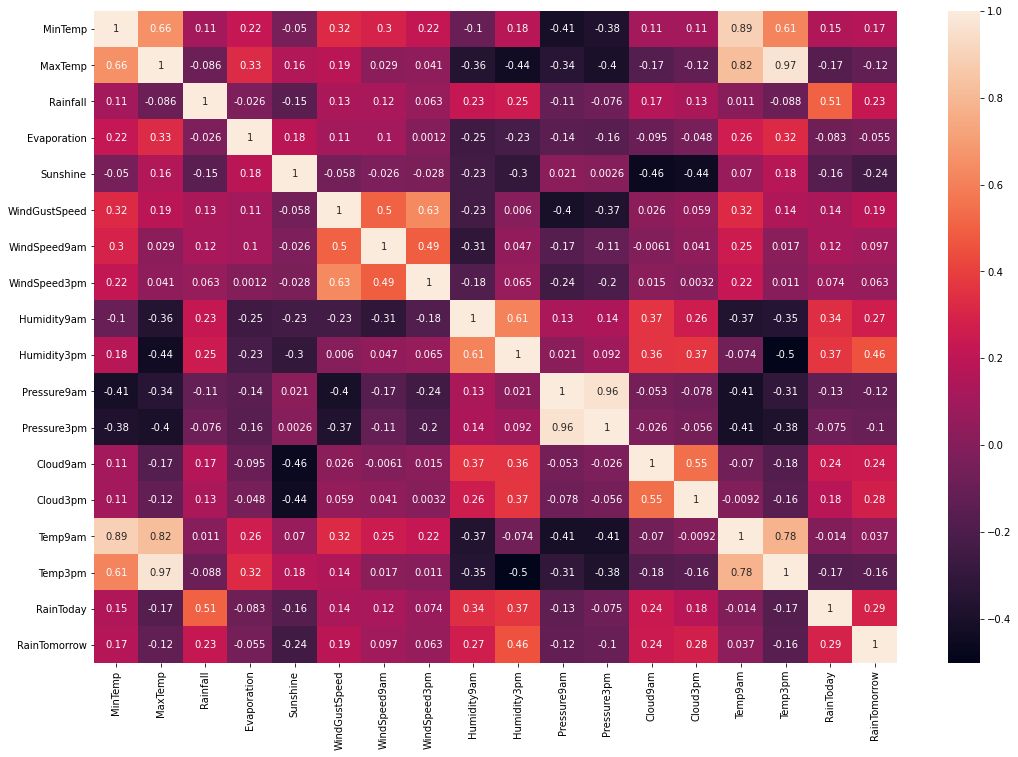

In [55]:
#heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

**Inferences from Heatmap**:
* MinTemp and Temp9am highly correlated.
* MinTemp and Temp3pm highly correlated.
* MaxTemp and Temp9am highly correlated.
* MaxTemp and Temp3pm highly correlated.
* Temp3pm and Temp9am highly correlated.
* Humidity9am and Humidity3pm highly correlated.

In [56]:
#encoding remaining columns
df["Location"] = le.fit_transform(df["Location"])
df["WindDir9am"]= le.fit_transform(df["WindDir9am"])
df["WindDir3pm"]= le.fit_transform(df["WindDir3pm"])
df["WindGustDir"] = le.fit_transform(df["WindGustDir"])

In [57]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,0,13.4,22.9,0.6,5.757227,7.811786,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.452521,16.9,21.8,0.0,0.0
1,2008-12-02,0,7.4,25.1,0.0,5.757227,7.811786,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.327575,4.452521,17.2,24.3,0.0,0.0
2,2008-12-03,0,12.9,25.7,0.0,5.757227,7.811786,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.327575,2.000000,21.0,23.2,0.0,0.0
3,2008-12-04,0,9.2,28.0,0.0,5.757227,7.811786,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.327575,4.452521,18.1,26.5,0.0,0.0
4,2008-12-05,0,17.5,32.3,1.0,5.757227,7.811786,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0


In [58]:
# Dropping highly correlated columns
df=df.drop(['Temp3pm','Temp9am','Humidity9am',"Date"],axis=1)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [59]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,5.757227,7.811786,13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.452521,0.0,0.0
1,0,7.4,25.1,0.0,5.757227,7.811786,14,44.0,6,15,4.0,22.0,25.0,1010.6,1007.8,4.327575,4.452521,0.0,0.0
2,0,12.9,25.7,0.0,5.757227,7.811786,15,46.0,13,15,19.0,26.0,30.0,1007.6,1008.7,4.327575,2.000000,0.0,0.0
3,0,9.2,28.0,0.0,5.757227,7.811786,4,24.0,9,0,11.0,9.0,16.0,1017.6,1012.8,4.327575,4.452521,0.0,0.0
4,0,17.5,32.3,1.0,5.757227,7.811786,13,41.0,1,7,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.000000,0.0,0.0


In [60]:
x=df.drop(['RainTomorrow','Location','WindGustDir','WindGustSpeed','WindDir3pm','WindDir9am','WindSpeed3pm','Pressure3pm','Cloud3pm','Evaporation','RainToday','Pressure9am','WindSpeed9am'],axis=1)
y=df['RainTomorrow']
x.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Humidity3pm',
       'Cloud9am'],
      dtype='object')

### Splitting data into Training and Testing Set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### RandomforestClassifier

In [62]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      4728
         1.0       0.67      0.43      0.52      1272

    accuracy                           0.83      6000
   macro avg       0.76      0.68      0.71      6000
weighted avg       0.82      0.83      0.82      6000

Accuracy of the RandomForest Model is: 83.35000000000001 %


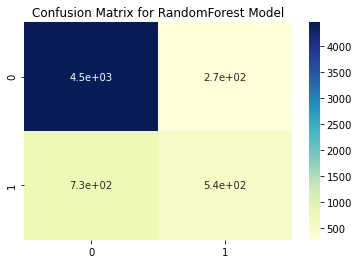

In [63]:
# accuracy of RandomForest Model
y_predxgb = model.predict(X_test)
report = classification_report(y_test, y_predxgb)
print(report)
print("Accuracy of the RandomForest Model is:",accuracy_score(y_test,y_predxgb)*100,"%")
cm = confusion_matrix(y_test, y_predxgb)
sns.heatmap(cm, annot=True,cmap="YlGnBu")
plt.title("Confusion Matrix for RandomForest Model")
plt.show()

In [64]:
import pickle
filename='Finalmodel.sav'
pickle.dump(model,open(filename,'wb'))

In [65]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0,13.4,22.9,0.6,5.757227,7.811786,13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.452521,0.0,0.0
1,0,7.4,25.1,0.0,5.757227,7.811786,14,44.0,6,15,4.0,22.0,25.0,1010.6,1007.8,4.327575,4.452521,0.0,0.0
2,0,12.9,25.7,0.0,5.757227,7.811786,15,46.0,13,15,19.0,26.0,30.0,1007.6,1008.7,4.327575,2.000000,0.0,0.0
3,0,9.2,28.0,0.0,5.757227,7.811786,4,24.0,9,0,11.0,9.0,16.0,1017.6,1012.8,4.327575,4.452521,0.0,0.0
4,0,17.5,32.3,1.0,5.757227,7.811786,13,41.0,1,7,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,9,20.5,32.3,0.0,8.000000,7.811786,2,30.0,8,9,4.0,13.0,52.0,1014.2,1011.9,4.327575,4.452521,0.0,0.0
29996,9,18.8,36.6,0.0,5.800000,7.811786,0,35.0,14,1,7.0,15.0,41.0,1013.0,1007.5,4.327575,4.452521,0.0,0.0
29997,9,21.6,39.5,0.0,7.000000,7.811786,4,33.0,4,0,11.0,9.0,22.0,1007.0,1003.4,1.000000,2.000000,0.0,0.0
29998,9,23.1,35.7,0.0,8.600000,7.811786,14,26.0,1,8,6.0,11.0,39.0,1003.7,1001.3,1.000000,4.452521,0.0,0.0
